### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno as ms

In [2]:
plt.style.use('ggplot')

from matplotlib import cm
from math import log10
from matplotlib.colors import rgb2hex

### Loading Datasets

In [3]:
matches = pd.read_csv("matches.csv")
deliv = pd.read_csv("deliveries.csv")

In [4]:
matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [5]:
deliv.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


### Matches data analysis

In [6]:
matches=matches.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [7]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [8]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [9]:
matches.describe(include = "O")

,city,date,team1,team2,toss_winner,toss_decision,result,winner,player_of_match,venue,umpire1,umpire2,umpire3
count,749,756,756,756,756,756,756,752,752,756,754,754,119
unique,32,546,14,14,14,2,3,14,226,41,61,65,25
top,Mumbai,2013-04-13,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,Mumbai Indians,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,C Shamshuddin
freq,101,2,101,95,98,463,743,109,21,77,73,57,10


In [10]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

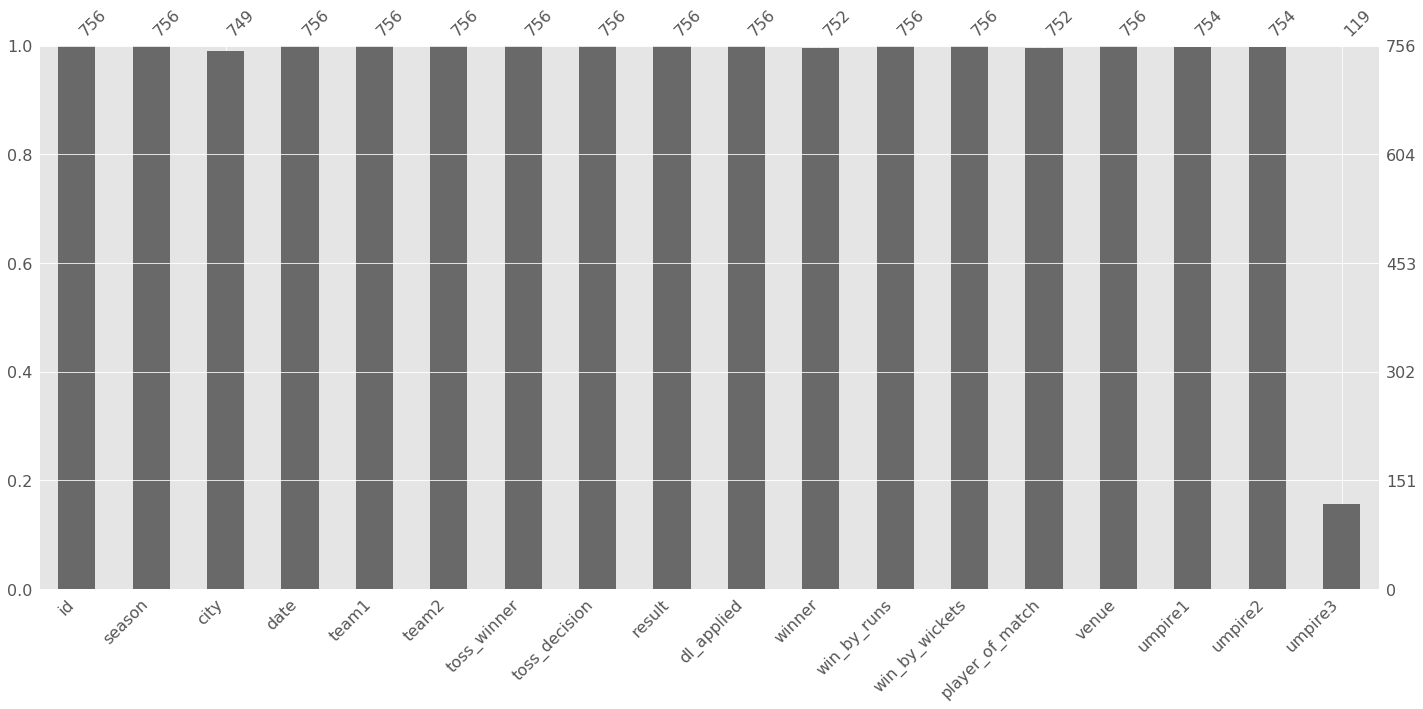

In [11]:
ms.bar(matches)

In [12]:
matches.drop("umpire3" ,axis=1,inplace=True)

In [13]:
matches[matches['city'].isnull()]['venue']

461    Dubai International Cricket Stadium
462    Dubai International Cricket Stadium
466    Dubai International Cricket Stadium
468    Dubai International Cricket Stadium
469    Dubai International Cricket Stadium
474    Dubai International Cricket Stadium
476    Dubai International Cricket Stadium
Name: venue, dtype: object

In [14]:
matches[matches['umpire1'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [15]:
matches['city'].fillna('Dubai', inplace =True)

In [16]:
matches.dropna(subset = ['winner'] ,inplace=True)

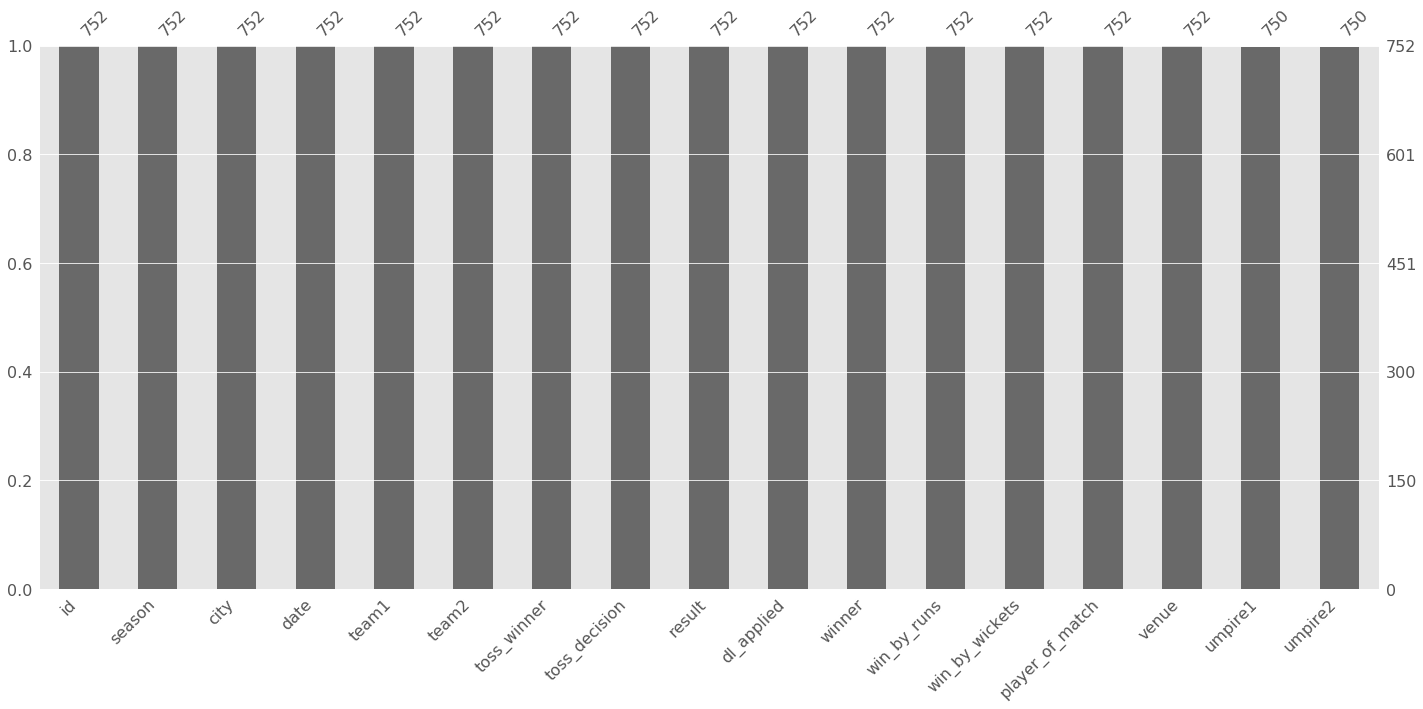

In [17]:
ms.bar(matches)

In [18]:
match = matches.copy()

In [19]:
match.loc[4, 'umpire1'] = 'Virender Sharma'
match.loc[4, 'umpire2'] = 'Sundaram Ravi'

match.loc[753, 'umpire1'] = 'Bruce Oxenford'
match.loc[753, 'umpire2'] = 'Sundaram Ravi'

In [20]:
matches = match.copy()
del match

In [21]:
deliv=deliv[deliv['is_super_over']==0]
deliv['wicket']=(deliv['player_dismissed'].notnull()).astype('int')
deliv=deliv.replace('Rising Pune Supergiants','Rising Pune Supergiant')

In [22]:
season_colors=['#1997f3','#3d90e2','#5786ce','#707ab6','#8072aa','#976590',
              '#9e6088','#ae5673','#c1475c','#d13d49','#e22d31','#f01917']

In [23]:
team_colors={'Sunrisers Hyderabad':'#e86629', 'Mumbai Indians':'#114180', 'Gujarat Lions':'#f7794e',
 'Rising Pune Supergiant':'#4c4776', 'Royal Challengers Bangalore':'#e33323',
 'Kolkata Knight Riders':'#321650', 'Delhi Capitals':'#2560ae', 'Kings XI Punjab':'#df2125',
 'Chennai Super Kings':'#f4e54c', 'Rajasthan Royals':'#e91a84', 'Deccan Chargers':'#283549',
 'Kochi Tuskers Kerala':'#ee6226', 'Pune Warriors':'#56c2d7','Delhi Daredevils':'#f4e54c'}
over_colors=["red","red","red","red","red","red","orange","orange","orange","orange","orange",
            "orange","orange","orange","orange","green","green","green","green","green"]

In [24]:
matches_per_team1=matches.groupby('team2')['team2'].count()
matches_per_team2=matches.groupby('team1')['team1'].count()

matches_per_team = matches_per_team1 + matches_per_team2
matches_per_season=matches.groupby('season')['season'].count()
matches_per_team

team2
Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                  16
Delhi Daredevils               159
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   45
Rajasthan Royals               145
Rising Pune Supergiant          30
Royal Challengers Bangalore    177
Sunrisers Hyderabad            108
dtype: int64

In [69]:
toss_decision = matches['toss_decision'].value_counts().reset_index()
toss_decision.columns = ['Toss_decision', 'Count']

fig = px.pie(toss_decision, values='Count', names='Toss_decision', title='Toss Decision')
fig.show()

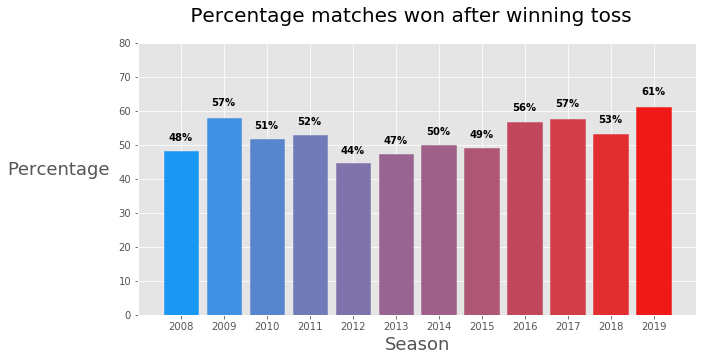

In [26]:
seasons=matches['season'].unique()
teams=matches['team1'].unique()
seasons=np.sort(seasons)
perc_win=[]
matches_toss_match_winner=matches[matches['toss_winner']==matches['winner']]
matches_toss_match_winner_season=matches_toss_match_winner.groupby('season')['season'].count()
matches_toss_match_winner_team=matches_toss_match_winner.groupby('winner')['winner'].count()

for i in seasons:
    perc_win.append((matches_toss_match_winner_season[i]/matches_per_season[i])*100)

fig=plt.figure(figsize=(10,5))
plt.ylim(0,80)
rects=plt.bar(seasons,perc_win)
plt.xticks(seasons)

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, str(int(height))+"%",ha='center', va='bottom',color='black',fontweight='bold')
for i in range(12):
    rects[i].set_color(season_colors[i])
    
fig.suptitle(' Percentage matches won after winning toss',fontsize=20)
plt.xlabel('Season', fontsize=18)
plt.ylabel('Percentage', fontsize=18,rotation=0,labelpad=60)

plt.show()

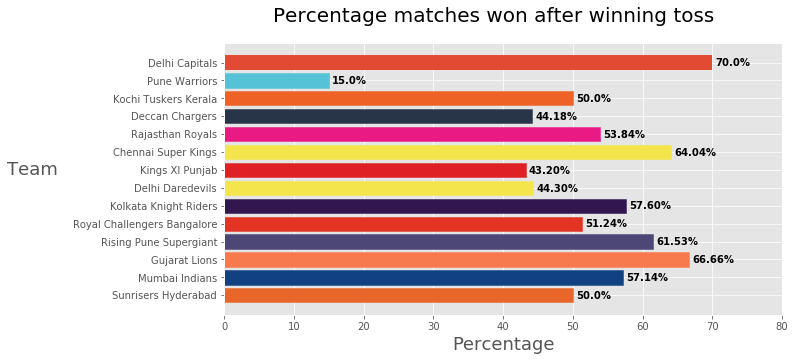

In [27]:
toss_wins=matches.groupby('toss_winner')['toss_winner'].count()
perc_win=[]
for i in teams:
    perc_win.append((matches_toss_match_winner_team[i]/toss_wins[i])*100)

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(0,80)
rects=plt.barh(teams,perc_win)

for i, v in enumerate(perc_win):
    ax.text(v+0.5 , i + .25, str(v)[:5]+"%", color='black', fontweight='bold',va='top')

fig.suptitle('Percentage matches won after winning toss',fontsize=20)
plt.xlabel('Percentage', fontsize=18)
plt.ylabel('Team', fontsize=18,rotation=0,labelpad=40)

for i in range(13):
    rects[i].set_color(team_colors[teams[i]])

plt.show()

In [28]:
sorted(matches['city'].unique())

['Abu Dhabi',
 'Ahmedabad',
 'Bangalore',
 'Bengaluru',
 'Bloemfontein',
 'Cape Town',
 'Centurion',
 'Chandigarh',
 'Chennai',
 'Cuttack',
 'Delhi',
 'Dharamsala',
 'Dubai',
 'Durban',
 'East London',
 'Hyderabad',
 'Indore',
 'Jaipur',
 'Johannesburg',
 'Kanpur',
 'Kimberley',
 'Kochi',
 'Kolkata',
 'Mohali',
 'Mumbai',
 'Nagpur',
 'Port Elizabeth',
 'Pune',
 'Raipur',
 'Rajkot',
 'Ranchi',
 'Sharjah',
 'Visakhapatnam']

In [29]:
matches['city'] = matches['city'].replace('Bengaluru', 'Bangalore')

In [30]:
sorted(matches['team1'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [31]:
sorted(matches['team1'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [32]:
sorted(matches['team2'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [33]:
most_played_in_city = matches['city'].value_counts().reset_index()
most_played_in_city.columns = ['City', 'Count']

fig = px.bar(most_played_in_city, x='City', y='Count', text=most_played_in_city['Count'], title='Most to least favourite city that have hosted match | 2008-2019')
fig.show()

fig = px.pie(most_played_in_city, values='Count', names='City', title='')
fig.show()

In [34]:
team_palyed_wins = pd.DataFrame((team, matches[(matches['team1']==team) | (matches['team2']==team)].shape[0], matches[matches['winner']==team].shape[0]) for team in matches['team1'].unique())
team_palyed_wins.columns = ['Team', 'Played_match', 'Wins_match']
team_palyed_wins = team_palyed_wins.sort_values(by='Played_match', ascending=False)

team_palyed_wins['Win_percent'] = round(team_palyed_wins['Wins_match']*100 / team_palyed_wins['Played_match'], 2)
team_palyed_wins

,Team,Played_match,Wins_match,Win_percent
1,Mumbai Indians,187,109,58.29
5,Kolkata Knight Riders,178,92,51.69
4,Royal Challengers Bangalore,177,84,47.46
7,Kings XI Punjab,176,82,46.59
8,Chennai Super Kings,164,100,60.98
6,Delhi Daredevils,159,67,42.14
9,Rajasthan Royals,145,75,51.72
0,Sunrisers Hyderabad,108,58,53.70
10,Deccan Chargers,75,29,38.67
12,Pune Warriors,45,12,26.67


In [35]:
teams = team_palyed_wins['Team'].tolist()
played = team_palyed_wins['Played_match'].tolist()
wins = team_palyed_wins['Wins_match'].tolist()

fig = go.Figure(data=[
    go.Bar(name='Played Match', x=teams, y=played, text=played, textposition='auto'),
    go.Bar(name='Win Match', x=teams, y=wins, text=wins, textposition='auto')
])

fig.update_layout(barmode='stack', title_text='Played Vs Wins | 2008 - 2019')
fig.update_xaxes(tickangle=90)
fig.show()

In [36]:
fig = px.bar(team_palyed_wins, x="Team", y="Win_percent", text=team_palyed_wins['Win_percent'], color='Team', title="Win Percentage | Played vs Win | 2008-2019")
fig.update_xaxes(tickangle=90)
fig.show()

fig = px.pie(team_palyed_wins, values='Wins_match', names='Team', title='Win Percentage vs Other Team | 2008-2019')
fig.show()

In [37]:
ipl_winner_by_season = []

for year in range(2008, 2020):
    highest_winner = matches[matches['season']==year]['winner'].value_counts()
    if highest_winner[0]==highest_winner[1]:
        ipl_winner_by_season.append((highest_winner.index[1], year, highest_winner[1]))
        
    ipl_winner_by_season.append((highest_winner.index[0], year, highest_winner[0]))

In [38]:
ipl_winner_by_season = pd.DataFrame(ipl_winner_by_season)
ipl_winner_by_season.columns = ['Team', 'Season', 'Wins']


fig = px.bar(ipl_winner_by_season, x="Team", y="Wins", color="Team", text=ipl_winner_by_season['Season'], title="Highest match winner team in every season")
fig.update_xaxes(tickangle=90)
fig.show()

In [39]:
top_10_player_of_the_match = matches['player_of_match'].value_counts()[:10].reset_index()
top_10_player_of_the_match.columns = ['Player', 'Count']

fig = px.bar(top_10_player_of_the_match, x="Player", y="Count", text=top_10_player_of_the_match['Count'], color='Player', title="Top 10 Player of the match | 2008-2019")
fig.update_xaxes(tickangle=90)
fig.show()

In [40]:
player_of_season = pd.DataFrame([(year, matches[matches['season']==year]['player_of_match'].value_counts().index[0], matches[matches['season']==year]['player_of_match'].value_counts()[0]) for year in range(2008, 2020)])
player_of_season.columns = ['Season', 'Player', 'Count']

player_of_season
fig = px.bar(player_of_season, x="Player", y="Count", text=player_of_season['Season'], color='Player', title="Player of the Season | 2008-2019")
fig.update_xaxes(tickangle=90)
fig.show()

### Deliveries data analysis

### Batsmen Analysis

In [41]:
batsman_grp = deliv.groupby(["match_id", "inning", "batting_team", "batsman"])
batsmen = batsman_grp["batsman_runs"].sum().reset_index()
batsmen.head(10)

,match_id,inning,batting_team,batsman,batsman_runs
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16
1,1,1,Sunrisers Hyderabad,DA Warner,14
2,1,1,Sunrisers Hyderabad,DJ Hooda,16
3,1,1,Sunrisers Hyderabad,MC Henriques,52
4,1,1,Sunrisers Hyderabad,S Dhawan,40
5,1,1,Sunrisers Hyderabad,Yuvraj Singh,62
6,1,2,Royal Challengers Bangalore,A Choudhary,6
7,1,2,Royal Challengers Bangalore,CH Gayle,32
8,1,2,Royal Challengers Bangalore,KM Jadhav,31
9,1,2,Royal Challengers Bangalore,Mandeep Singh,24


In [42]:
balls_faced = deliv[deliv["wide_runs"] == 0]
balls_faced = balls_faced.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
balls_faced.columns = ["match_id", "inning", "batsman", "balls_faced"]
batsmen = batsmen.merge(balls_faced, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

In [43]:
fours = deliv[ deliv["batsman_runs"] == 4]
sixes = deliv[ deliv["batsman_runs"] == 6]

In [44]:
fours_per_batsman = fours.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_per_batsman = sixes.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()

In [45]:
fours_per_batsman.columns = ["match_id", "inning", "batsman", "4s"]
sixes_per_batsman.columns = ["match_id", "inning", "batsman", "6s"]

batsmen = batsmen.merge(fours_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen = batsmen.merge(sixes_per_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen['SR'] = np.round(batsmen['batsman_runs'] / batsmen['balls_faced'] * 100, 2)

for col in ["batsman_runs", "4s", "6s", "balls_faced", "SR"]:
    batsmen[col] = batsmen[col].fillna(0)

dismissals = deliv[ pd.notnull(deliv["player_dismissed"])]
dismissals = dismissals[["match_id", "inning", "player_dismissed", "dismissal_kind", "fielder"]]
dismissals.rename(columns={"player_dismissed": "batsman"}, inplace=True)
batsmen = batsmen.merge(dismissals, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")

batsmen = matches[['id','season']].merge(batsmen, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)
batsmen.head(10)

,season,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR,dismissal_kind,fielder
0,2017,1,1,Sunrisers Hyderabad,BCJ Cutting,16,6.0,0.0,2.0,266.67,NaN,NaN
1,2017,1,1,Sunrisers Hyderabad,DA Warner,14,8.0,2.0,1.0,175.00,caught,Mandeep Singh
2,2017,1,1,Sunrisers Hyderabad,DJ Hooda,16,12.0,0.0,1.0,133.33,NaN,NaN
3,2017,1,1,Sunrisers Hyderabad,MC Henriques,52,37.0,3.0,2.0,140.54,caught,Sachin Baby
4,2017,1,1,Sunrisers Hyderabad,S Dhawan,40,31.0,5.0,0.0,129.03,caught,Sachin Baby
5,2017,1,1,Sunrisers Hyderabad,Yuvraj Singh,62,27.0,7.0,3.0,229.63,bowled,NaN
6,2017,1,2,Royal Challengers Bangalore,A Choudhary,6,2.0,0.0,1.0,300.00,NaN,NaN
7,2017,1,2,Royal Challengers Bangalore,CH Gayle,32,21.0,2.0,3.0,152.38,caught,DA Warner
8,2017,1,2,Royal Challengers Bangalore,KM Jadhav,31,16.0,4.0,1.0,193.75,run out,BCJ Cutting
9,2017,1,2,Royal Challengers Bangalore,Mandeep Singh,24,16.0,5.0,0.0,150.00,bowled,NaN


In [46]:
batsmen.shape

(11271, 12)

In [47]:
batsmen.describe(include='O')

,batting_team,batsman,dismissal_kind,fielder
count,11271,11271,8756,6380
unique,14,516,9,497
top,Mumbai Indians,SK Raina,caught,MS Dhoni
freq,1414,189,5326,158


In [48]:
batsmen.describe()

,season,match_id,inning,batsman_runs,balls_faced,4s,6s,SR
count,11271.000000,11271.000000,11271.000000,11271.000000,11271.000000,11271.000000,11271.000000,11271.000000
mean,2013.415846,1775.779523,1.492059,19.749978,15.369710,1.803567,0.721764,111.733081
std,3.372364,3443.462927,0.505957,21.121131,13.533403,2.299745,1.304944,66.815798
min,2008.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,185.500000,1.000000,4.000000,5.000000,0.000000,0.000000,66.670000
50%,2013.000000,375.000000,1.000000,13.000000,11.000000,1.000000,0.000000,110.000000
75%,2016.000000,564.000000,2.000000,29.000000,22.000000,3.000000,1.000000,150.000000
max,2019.000000,11415.000000,5.000000,175.000000,73.000000,19.000000,17.000000,600.000000


### Balling Analysis

In [49]:
bowler_grp = deliv.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])

In [50]:
baller = bowler_grp["total_runs", "wide_runs", "bye_runs", "legbye_runs", "noball_runs"].sum().reset_index()

In [51]:
baller["runs"] = baller["total_runs"] - (baller["bye_runs"] + baller["legbye_runs"])
baller["extras"] = baller["wide_runs"] + baller["noball_runs"]

del( baller["bye_runs"])
del( baller["legbye_runs"])
del( baller["total_runs"])

dismissal_kinds_for_bowler = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
dismissals = deliv[deliv["dismissal_kind"].isin(dismissal_kinds_for_bowler)]
dismissals = dismissals.groupby(["match_id", "inning", "bowling_team", "bowler", "over"])["dismissal_kind"].count().reset_index()
dismissals.rename(columns={"dismissal_kind": "wickets"}, inplace=True)

baller = baller.merge(dismissals, left_on=["match_id", "inning", "bowling_team", "bowler", "over"], 
                        right_on=["match_id", "inning", "bowling_team", "bowler", "over"], how="left")
baller["wickets"] = baller["wickets"].fillna(0)

baller_over = baller.groupby(['match_id', 'inning', 'bowling_team', 'bowler'])['over'].count().reset_index()
baller = baller.groupby(['match_id', 'inning', 'bowling_team', 'bowler']).sum().reset_index().drop('over', 1)
baller = baller_over.merge(baller, on=["match_id", "inning", "bowling_team", "bowler"], how = 'left')
baller['Econ'] = np.round(baller['runs'] / baller['over'] , 2)
baller = matches[['id','season']].merge(baller, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

baller.head(10)

,season,match_id,inning,bowling_team,bowler,over,wide_runs,noball_runs,runs,extras,wickets,Econ
0,2017,1,1,Royal Challengers Bangalore,A Choudhary,4,3,1,55,4,1.0,13.75
1,2017,1,1,Royal Challengers Bangalore,S Aravind,3,0,0,36,0,0.0,12.00
2,2017,1,1,Royal Challengers Bangalore,SR Watson,3,0,0,41,0,0.0,13.67
3,2017,1,1,Royal Challengers Bangalore,STR Binny,1,0,0,10,0,1.0,10.00
4,2017,1,1,Royal Challengers Bangalore,TM Head,1,0,0,11,0,0.0,11.00
5,2017,1,1,Royal Challengers Bangalore,TS Mills,4,2,0,31,2,1.0,7.75
6,2017,1,1,Royal Challengers Bangalore,YS Chahal,4,0,0,22,0,1.0,5.50
7,2017,1,2,Sunrisers Hyderabad,A Nehra,4,1,0,42,1,2.0,10.50
8,2017,1,2,Sunrisers Hyderabad,B Kumar,4,1,0,27,1,2.0,6.75
9,2017,1,2,Sunrisers Hyderabad,BCJ Cutting,4,2,0,35,2,0.0,8.75


In [52]:
baller.describe(include="O")

,bowling_team,bowler
count,8952,8952
unique,14,404
top,Mumbai Indians,Harbhajan Singh
freq,1126,157


In [53]:
baller.describe()

,season,match_id,inning,over,wide_runs,noball_runs,runs,extras,wickets,Econ
count,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000,8952.000000
mean,2013.409964,1763.707998,1.498101,3.237377,0.733244,0.082775,25.683311,0.816019,0.886841,8.223522
std,3.369400,3429.354004,0.503143,1.021639,1.239276,0.344396,10.725983,1.299948,0.981016,3.064728
min,2008.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2011.000000,186.000000,1.000000,3.000000,0.000000,0.000000,18.000000,0.000000,0.000000,6.000000
50%,2013.000000,373.500000,1.000000,4.000000,0.000000,0.000000,25.000000,0.000000,1.000000,8.000000
75%,2016.000000,566.000000,2.000000,4.000000,1.000000,0.000000,33.000000,1.000000,1.000000,10.000000
max,2019.000000,11415.000000,5.000000,4.000000,11.000000,6.000000,73.000000,11.000000,6.000000,29.000000


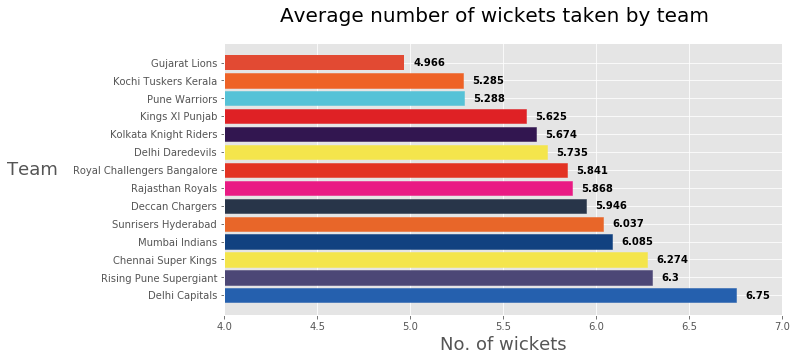

In [54]:
team_wickets=deliv.groupby('bowling_team').agg({'wicket':'sum'}).wicket
wpm=(team_wickets/matches_per_team).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(4,7)
rects=plt.barh(wpm.keys(),wpm.values)

for i, v in enumerate(wpm.values):
    ax.text(v+0.05 , i + .25, str(v)[:5], color='black', fontweight='bold',va='top')

fig.suptitle('Average number of wickets taken by team',fontsize=20)
plt.xlabel('No. of wickets', fontsize=18)
plt.ylabel('Team', fontsize=18,rotation=0,labelpad=40)

for i in range(13):
    rects[i].set_color(team_colors[wpm.keys()[i]])

plt.show()

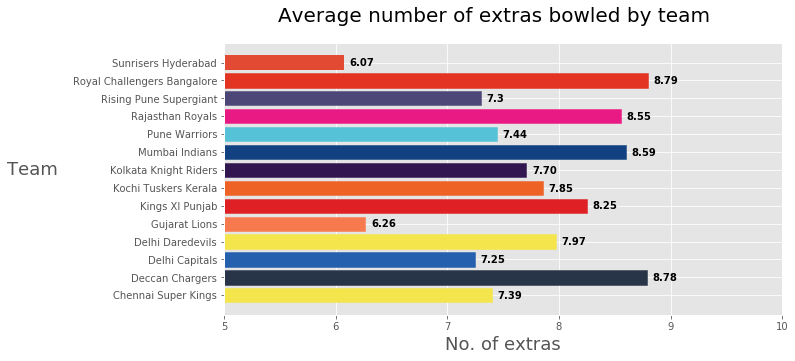

In [55]:
#Extras per match by team
team_extras=deliv.groupby('bowling_team').agg({'extra_runs':'sum'}).extra_runs
expm=team_extras/matches_per_team

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(5,10)
rects=plt.barh(expm.keys(),expm.values)

for i, v in enumerate(expm.values):
    ax.text(v+0.05 , i + .25, str(v)[:4], color='black', fontweight='bold',va='top')

fig.suptitle('Average number of extras bowled by team',fontsize=20)
plt.xlabel('No. of extras', fontsize=18)
plt.ylabel('Team', fontsize=18,rotation=0,labelpad=40)

for i in range(13):
    rects[i].set_color(team_colors[expm.keys()[i]])

plt.show()

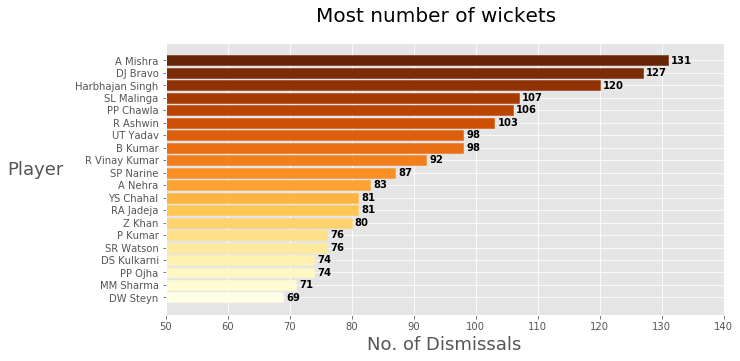

In [56]:
#Most wickets
bowler_wicket=deliv[deliv["dismissal_kind"].isin(["caught", "bowled ", "lbw","stumped","caught and bowled" ])]
bowler_wicket=bowler_wicket.groupby('bowler')['bowler'].count()
bowler_wicket=bowler_wicket.sort_values(ascending=False)[:20][::-1]

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(50,140)
rects=plt.barh(bowler_wicket.keys(),bowler_wicket.values)

for i, v in enumerate(bowler_wicket.values):
    ax.text(v+0.5 , i + .4, str(v)[:5], color='black', fontweight='bold',va='top')

fig.suptitle('Most number of wickets',fontsize=20)
plt.xlabel('No. of Dismissals', fontsize=18)
plt.ylabel('Player', fontsize=18,rotation=0,labelpad=40)

cmap = cm.get_cmap('YlOrBr', 20)
for i in range(20):
    rects[i].set_color(rgb2hex(cmap(i)))

plt.show()


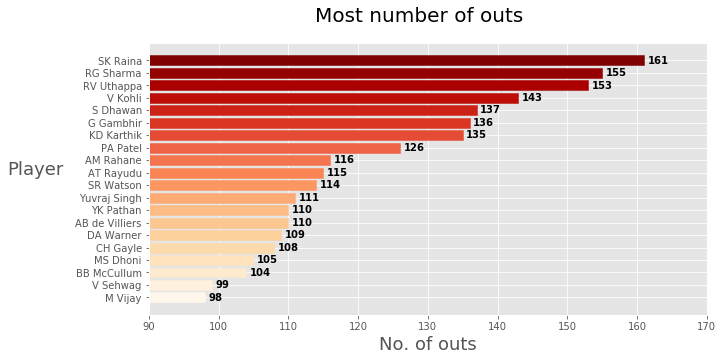

In [57]:
most_dismissed=deliv['player_dismissed'].value_counts()[:20][::-1]

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(90,170)
rects=plt.barh(most_dismissed.keys(),most_dismissed.values)

for i, v in enumerate(most_dismissed.values):
    ax.text(v+0.5 , i + .4, str(v)[:5], color='black', fontweight='bold',va='top')

fig.suptitle('Most number of outs',fontsize=20)
plt.xlabel('No. of outs', fontsize=18)
plt.ylabel('Player', fontsize=18,rotation=0,labelpad=40)

cmap = cm.get_cmap('OrRd', 20)
for i in range(20):
    rects[i].set_color(rgb2hex(cmap(i)))

plt.show()

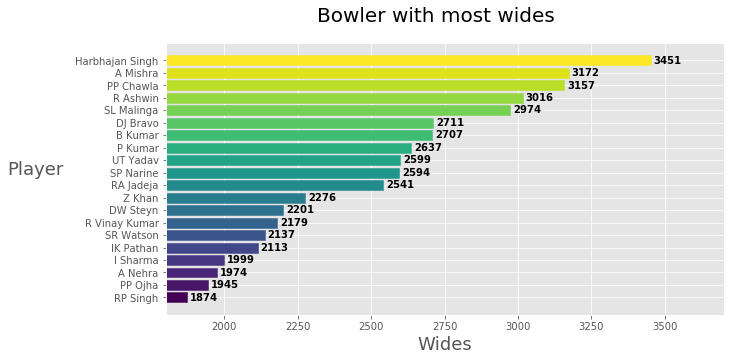

In [58]:
#Bowler with most wides
bowler_wides=deliv.groupby('bowler').agg({'bowler':'count'}).bowler
bmw=bowler_wides.sort_values(ascending=False)[:20][::-1]

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(1800,3700)
rects=plt.barh(bmw.keys(),bmw.values)

for i, v in enumerate(bmw.values):
    ax.text(v+10 , i + .4, str(v)[:5], color='black', fontweight='bold',va='top')

fig.suptitle("Bowler with most wides",fontsize=20)
plt.xlabel('Wides', fontsize=18)
plt.ylabel('Player', fontsize=18,rotation=0,labelpad=40)

cmap = cm.get_cmap('viridis', 20)
for i in range(20):
    rects[i].set_color(rgb2hex(cmap(i)))

plt.show()

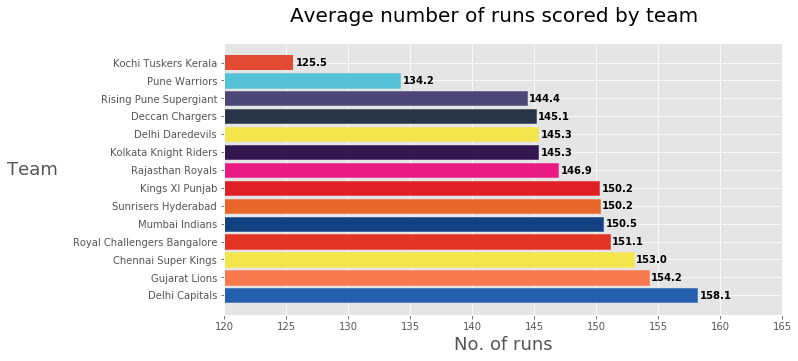

In [59]:
#Runs by team per match
team_run=deliv.groupby('batting_team').agg({'batsman_runs': 'sum'}).batsman_runs
rpm = (team_run/matches_per_team).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(120,165)
rects=plt.barh(rpm.keys(),rpm.values)

for i, v in enumerate(rpm.values):
    ax.text(v+0.2 , i + .25, str(v)[:5], color='black', fontweight='bold',va='top')

fig.suptitle('Average number of runs scored by team',fontsize=20)
plt.xlabel('No. of runs', fontsize=18)
plt.ylabel('Team', fontsize=18,rotation=0,labelpad=40)

for i in range(13):
    rects[i].set_color(team_colors[rpm.keys()[i]])

plt.show()

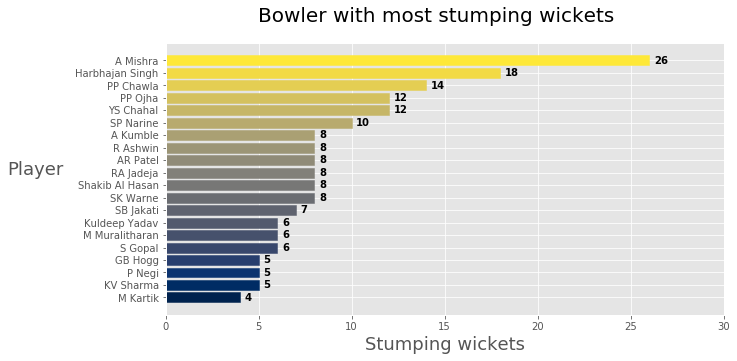

In [60]:
bowl_stump=deliv[(deliv['dismissal_kind'].isin(["stumped"])) & (deliv['wicket']==1) ]
bowl_stump=bowl_stump.groupby('bowler').agg({'bowler':'count'}).bowler
bmsw= bowl_stump.sort_values(ascending=False)[:20][::-1]

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(0,30)
rects=plt.barh(bmsw.keys(),bmsw.values)

for i, v in enumerate(bmsw.values):
    ax.text(v + 0.25 , i + .4, str(v)[:5], color='black', fontweight='bold',va='top')

fig.suptitle("Bowler with most stumping wickets",fontsize=20)
plt.xlabel('Stumping wickets', fontsize=18)
plt.ylabel('Player', fontsize=18,rotation=0,labelpad=40)

cmap = cm.get_cmap('cividis', 20)
for i in range(20):
    rects[i].set_color(rgb2hex(cmap(i)))

plt.show()

Text(0.5, 1.0, 'Team wise Bowling Average in IPL- Seasons 2008-2019')

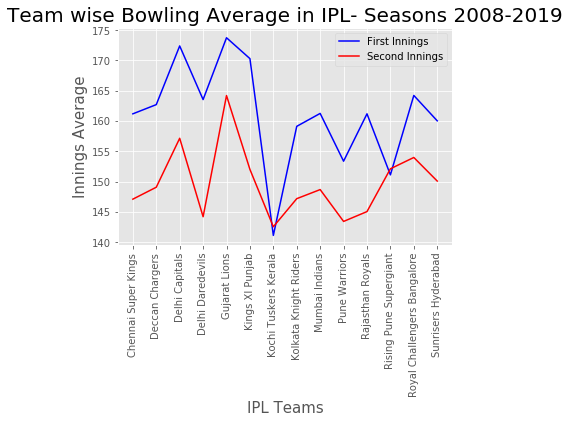

In [61]:
first_innins_score=deliv[deliv['inning']==1]
team_innings_score=first_innins_score.groupby(['bowling_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_score_avg=team_innings_score.groupby('bowling_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_innings_score_avg['bowling_team'],team_innings_score_avg['Innings Average'],'b')
second_innins_score=deliv[deliv['inning']==2]
team_innings_second_score=second_innins_score.groupby(['bowling_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_second_innings_score_avg=team_innings_second_score.groupby('bowling_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_second_innings_score_avg['bowling_team'],team_second_innings_score_avg['Innings Average'],'r')
plt.xticks(rotation=90)
plt.legend(['First Innings','Second Innings'],prop={'size':10})
plt.xlabel('IPL Teams',size=15)
plt.ylabel('Innings Average',size=15)
plt.title('Team wise Bowling Average in IPL- Seasons 2008-2019',size=20)

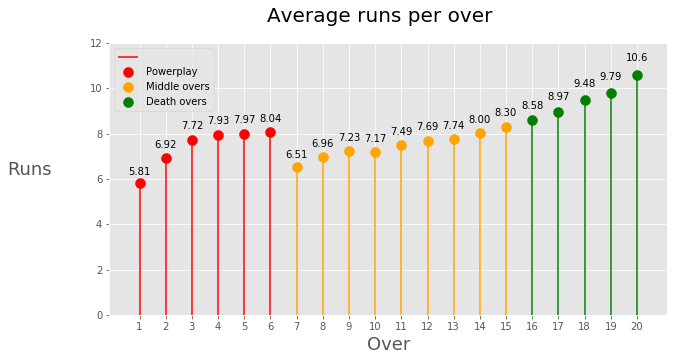

In [62]:
total_matches=len(deliv['match_id'].unique())
overs=deliv['over'].unique()
over_bowled=deliv.groupby('over')['over'].count()/6
over_runs=deliv.groupby('over').agg({'total_runs': 'sum'}).total_runs
rpo=over_runs/over_bowled

fig=plt.figure(figsize=(10,5))
plt.ylim(0,12)
rects=plt.bar(rpo.keys(),rpo.values,width=0)
plt.xticks(rpo.keys())

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, str(height)[:4],ha='center', va='bottom',color='black')

plt.vlines(rpo.keys(),0,rpo.values,color=over_colors,linestyles='solid')
plt.scatter(rpo.keys()[:6],rpo.values[:6], marker="o",s=100,color="red")
plt.scatter(rpo.keys()[6:15],rpo.values[6:15], marker="o",s=100,color="orange")
plt.scatter(rpo.keys()[15:],rpo.values[15:], marker="o",s=100,color="green")
    
    
fig.suptitle('Average runs per over',fontsize=20)
plt.xlabel('Over', fontsize=18)
plt.ylabel('Runs', fontsize=18,rotation=0,labelpad=60)

plt.legend(["", "Powerplay","Middle overs","Death overs"])
plt.show()

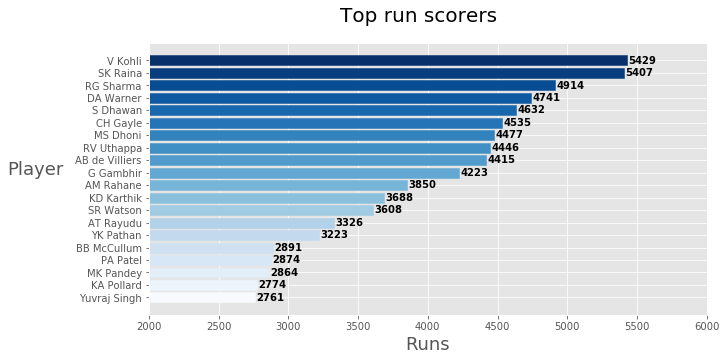

In [63]:
#Most runs scored
batsmen_runs=deliv.groupby('batsman').agg({'batsman_runs': 'sum'}).batsman_runs
most_runs=batsmen_runs.sort_values(ascending=False)[:20][::-1]

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(2000,6000)
rects=plt.barh(most_runs.keys(),most_runs.values)

for i, v in enumerate(most_runs.values):
    ax.text(v+10 , i + .4, str(v)[:5], color='black', fontweight='bold',va='top')

fig.suptitle('Top run scorers',fontsize=20)
plt.xlabel('Runs', fontsize=18)
plt.ylabel('Player', fontsize=18,rotation=0,labelpad=40)

cmap = cm.get_cmap('Blues', 20)
for i in range(20):
    rects[i].set_color(rgb2hex(cmap(i)))

plt.show()

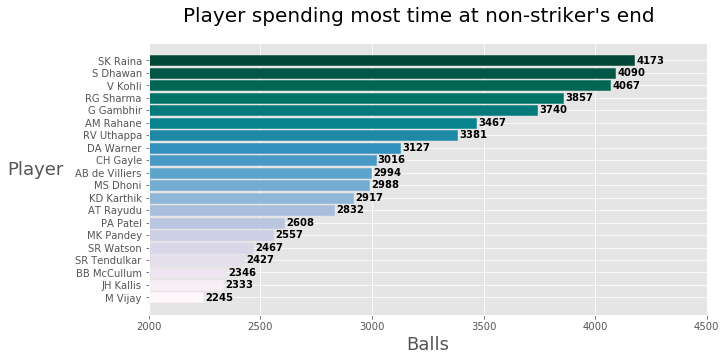

In [64]:
#Player spending most time at non-striker's end
nonstrike_balls=deliv.groupby('non_striker').agg({'non_striker':'count'}).non_striker
bat_non=nonstrike_balls.sort_values(ascending=False)[:20][::-1]

fig, ax = plt.subplots(figsize=(10,5))
plt.xlim(2000,4500)
rects=plt.barh(bat_non.keys(),bat_non.values)

for i, v in enumerate(bat_non.values):
    ax.text(v+10 , i + .4, str(v)[:5], color='black', fontweight='bold',va='top')

fig.suptitle("Player spending most time at non-striker's end",fontsize=20)
plt.xlabel('Balls', fontsize=18)
plt.ylabel('Player', fontsize=18,rotation=0,labelpad=40)

cmap = cm.get_cmap('PuBuGn', 20)
for i in range(20):
    rects[i].set_color(rgb2hex(cmap(i)))

plt.show()

The Top 10 Batting Performances in the IPL History are:
             batsman  Innings Runs  Balls Faced  Strike Rate for Match  inning  \
0          CH Gayle           175           69             253.623188       1   
69      BB McCullum           158           77             205.194805       1   
146  AB de Villiers           133           61             218.032787       1   
207         RR Pant           130           64             203.125000       1   
271  AB de Villiers           129           53             243.396226       1   
324        CH Gayle           128           62             206.451613       1   
386         M Vijay           127           57             222.807018       1   
443       DA Warner           126           60             210.000000       1   
503        V Sehwag           122           62             196.774194       1   
565       SR Watson           121           60             201.666667       2   

                    batting_team                 bo

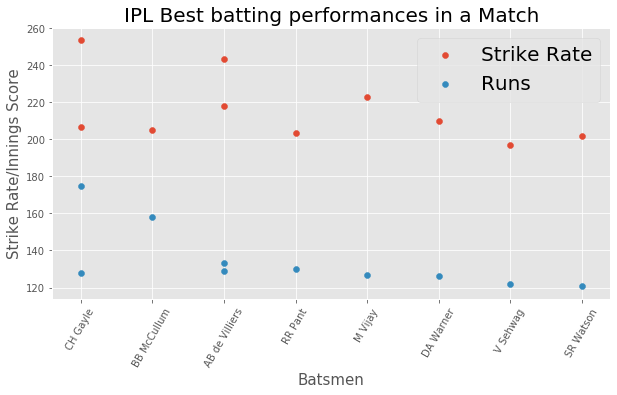

In [65]:
batting_ings=deliv.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
batting_ings_sorted=batting_ings.sort_values(by='Innings Runs',ascending=False)
top_batsmen_scores=batting_ings_sorted[:10] 
batsman_ball_faced=deliv.groupby(['match_id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance=pd.merge(top_batsmen_scores,batsman_ball_faced,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_performance['Strike Rate for Match']=batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced']
batsmen_innings=pd.merge(batsmen_performance,deliv,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_innings_req=batsmen_innings.iloc[:,1:8]
batsmen_innings_req_2=batsmen_innings_req.drop_duplicates()
print('The Top 10 Batting Performances in the IPL History are:\n',batsmen_innings_req_2)
x=batsmen_innings_req_2['batsman']
y1=batsmen_innings_req_2['Strike Rate for Match']
y2=batsmen_innings_req_2['Innings Runs']
plt.figure(figsize=(10,5))
plt.scatter(x,y1)
plt.scatter(x,y2)
plt.xlabel('Batsmen',size=15)
plt.ylabel('Strike Rate/Innings Score',size=15)
plt.title('IPL Best batting performances in a Match',size=20)
plt.xticks(rotation=60)
plt.legend(['Strike Rate','Runs'],prop={'size':20})

Text(0.5, 1.0, 'Team wise Batting Average in IPL- Seasons 2008-2019')

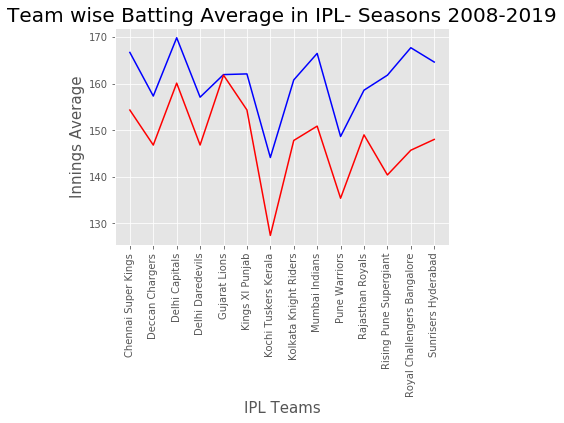

In [66]:
first_innins_run=deliv[deliv['inning']==1]
team_innings_run=first_innins_run.groupby(['batting_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_avg=team_innings_run.groupby('batting_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_innings_avg['batting_team'],team_innings_avg['Innings Average'],'b')
second_innins_run=deliv[deliv['inning']==2]
team_innings_run=second_innins_run.groupby(['batting_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_avg=team_innings_run.groupby('batting_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_innings_avg['batting_team'],team_innings_avg['Innings Average'],'r')
plt.xticks(rotation=90)
plt.xlabel('IPL Teams',size=15)
plt.ylabel('Innings Average',size=15)
plt.title('Team wise Batting Average in IPL- Seasons 2008-2019',size=20)

Text(23.999999999999986, 0.5, 'Match')

<Figure size 432x288 with 0 Axes>

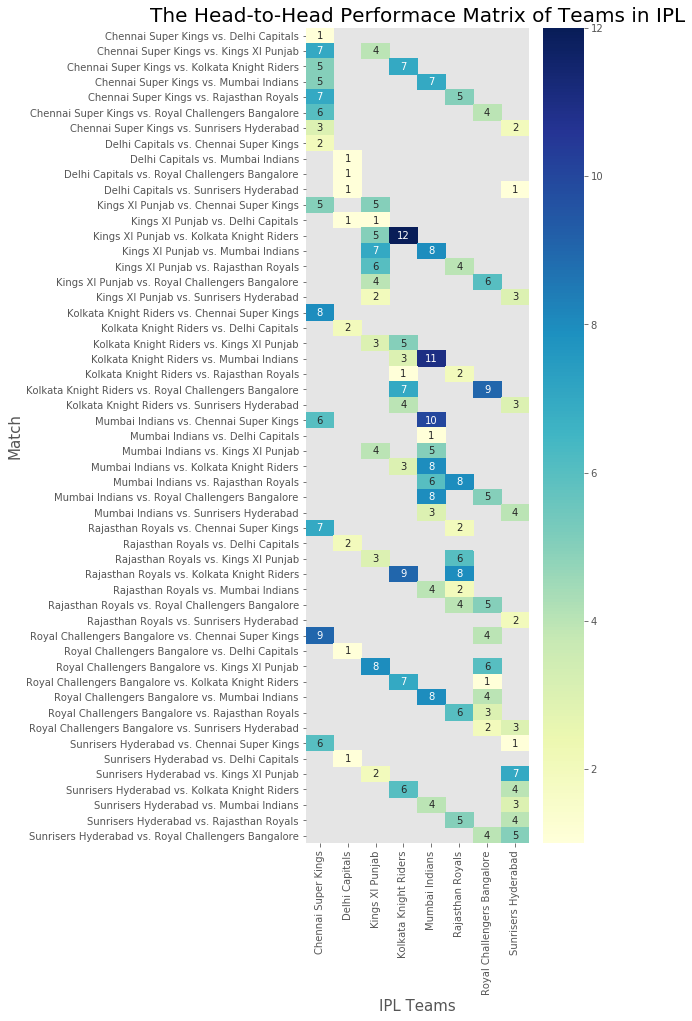

In [67]:
Current_teams=['Chennai Super Kings','Mumbai Indians','Rajasthan Royals','Delhi Capitals','Sunrisers Hyderabad','Kolkata Knight Riders','Royal Challengers Bangalore','Kings XI Punjab']
team_1_filter=matches[matches.team1.isin(Current_teams)]
team_2_filter=team_1_filter[team_1_filter.team2.isin(Current_teams)]
teams_filter=team_2_filter[team_2_filter.winner.isin(Current_teams)]
head_to_head_matches=teams_filter.groupby(['team1','team2','winner']).apply(lambda x:x['winner'].count()).reset_index(name='Winning Counts')
head_to_head_matches['Game']=head_to_head_matches['team1']+' vs. '+head_to_head_matches['team2']
head_to_head_matches.loc[:,['Game','winner','Winning Counts']]
heatmap1_data = pd.pivot_table(head_to_head_matches, values='Winning Counts', 
                     index=['Game'], 
                     columns='winner')
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,15))
g=sns.heatmap(heatmap1_data,annot=True, cmap="YlGnBu",fmt='g')
ax.set_title('The Head-to-Head Performace Matrix of Teams in IPL',size=20)
ax.set_xlabel('IPL Teams',size=15)
ax.set_ylabel('Match',size=15)